In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%pylab inline
import random

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# parameters
gamma = 0.6 # discounting rate
rewardSize = -1
gridSize = 5
terminationStates = [[0,0], [gridSize-1, gridSize-1]]
actions = [[-1, 0], [1, 0], [0, 1], [0, -1]]
numIterations = 10000

In [3]:
# initialization
V = np.zeros((gridSize, gridSize))
returns = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
deltas = {(i, j):list() for i in range(gridSize) for j in range(gridSize)}
states = [[i, j] for i in range(gridSize) for j in range(gridSize)]

In [4]:
# utils
def generateEpisode():
    initState = random.choice(states[1:-1])
    episode = []
    while True:
        if list(initState) in terminationStates:
            return episode
        action = random.choice(actions)
        finalState = np.array(initState)+np.array(action)
        if -1 in list(finalState) or gridSize in list(finalState):
            finalState = initState
        episode.append([list(initState), action, rewardSize, list(finalState)])
        initState = finalState

In [5]:
for it in tqdm(range(numIterations)):
    episode = generateEpisode()
    G = 0
    if(it == 0):
        print("Iteration:")
        print(it)
        print('\n')
        print(V)
    if(it == 1):
        print("Iteration:")
        print(it)
        print('\n')
        print(V)
    if(it == 10):
        print("Iteration:")
        print(it)
        print('\n')
        print(V)

    #print(episode)
    for i, step in enumerate(episode[::-1]):
        G = gamma*G + step[2]
        if step[0] not in [x[0] for x in episode[::-1][len(episode)-i:]]:
            idx = (step[0][0], step[0][1])
            returns[idx].append(G)
            newValue = np.max(returns[idx])
            deltas[idx[0], idx[1]].append(np.abs(V[idx[0], idx[1]]-newValue))
            V[idx[0], idx[1]] = newValue

  2%|▏         | 222/10000 [00:00<00:09, 1009.87it/s]

Iteration:
0


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Iteration:
1


[[ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.        ]
 [-2.49455804  0.          0.          0.          0.        ]
 [-2.49093007 -1.96       -1.6        -1.          0.        ]]
Iteration:
10


[[ 0.         -1.         -1.6        -2.3056     -2.430016  ]
 [-1.         -1.6        -1.96       -2.176      -2.4580096 ]
 [-1.6        -2.430016   -2.47480576 -1.96        0.        ]
 [-1.96       -2.38336    -2.3056     -1.6        -1.        ]
 [-2.176      -1.96       -1.6        -1.          0.        ]]


100%|██████████| 10000/10000 [01:01<00:00, 162.07it/s]


In [6]:
V

array([[ 0.   , -1.   , -1.6  , -1.96 , -2.176],
       [-1.   , -1.6  , -1.96 , -2.176, -1.96 ],
       [-1.6  , -1.96 , -2.176, -1.96 , -1.6  ],
       [-1.96 , -2.176, -1.96 , -1.6  , -1.   ],
       [-2.176, -1.96 , -1.6  , -1.   ,  0.   ]])

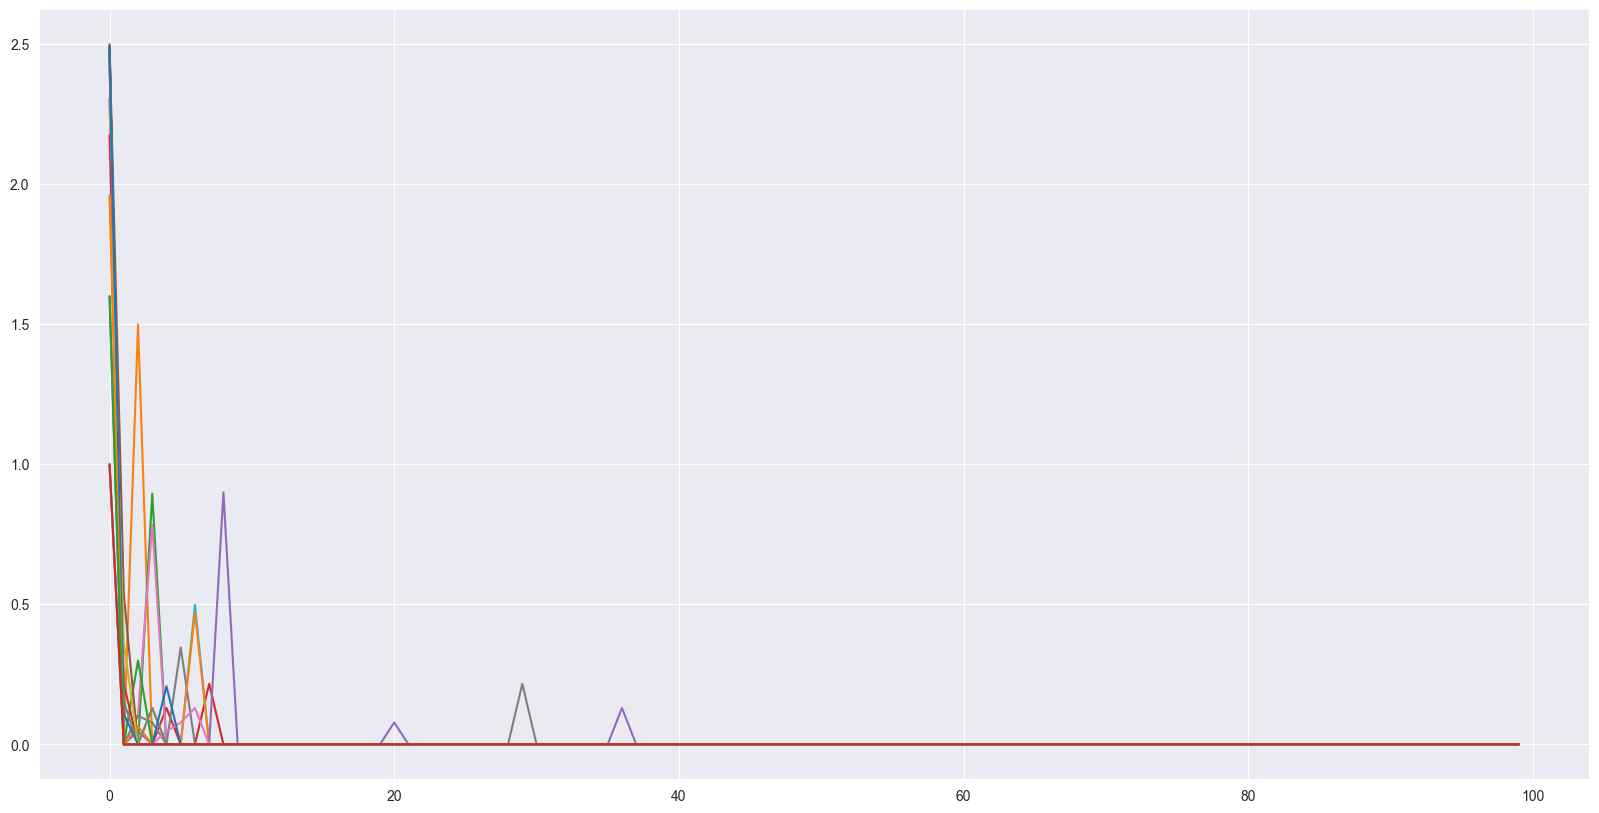

In [7]:
# using gamma = 1
plt.figure(figsize=(20,10))
all_series = [list(x)[:100] for x in deltas.values()]
for series in all_series:
    plt.plot(series)